## MOM1 Deg Up and PI winds

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage




Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/momsis1deg/output100/ocean_grid.nc'
vgrid_file ='/g/data1/v45/pas561/mom/archive/momsis1deg/output100/ocean.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
#fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print geolon_t.shape

#fh=fcor/ht
#print fh.shape

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print st_ocean.shape
print potrho.shape
print yt_ocean.shape


(300, 360)
(50,)
(80,)
(300,)


In [3]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.9.6


In [4]:
CntrlDir = '/g/data1/v45/pas561/mom/archive/momsis1deg/'
UPDir = '/g/data1/v45/pas561/mom/archive/momsis1deg_up/'
PIDir = '/g/data1/v45/pas561/mom/archive/momsis1deg_pi/'

ExpDirs=[CntrlDir, UPDir, PIDir]
print ExpDirs

['/g/data1/v45/pas561/mom/archive/momsis1deg/', '/g/data1/v45/pas561/mom/archive/momsis1deg_up/', '/g/data1/v45/pas561/mom/archive/momsis1deg_pi/']


## Calc the GMOC from ty_trans_rho for forcing cases

In [5]:
#up_gmoc=np.zeros((50,potrho.shape[0],yt_ocean.shape[0]))

Ocean_File = os.path.join(CntrlDir,'output*/ocean.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.ty_trans_rho.shape

gmoc=ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()

print gmoc.shape

of=os.path.join(CntrlDir,'gmocs_rho.npy')
a=np.save(of,gmoc)

/g/data1/v45/pas561/mom/archive/momsis1deg/output*/ocean.nc
(102, 80, 300, 360)
(102, 80, 300)


In [6]:
Ocean_File = os.path.join(UPDir,'output*/ocean.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.ty_trans_rho.shape

gmoc=ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()

print gmoc.shape

of=os.path.join(UPDir,'gmocs_rho.npy')
a=np.save(of,gmoc)


/g/data1/v45/pas561/mom/archive/momsis1deg_up/output*/ocean.nc
(30, 80, 300, 360)
(30, 80, 300)


In [7]:
Ocean_File = os.path.join(PIDir,'output*/ocean.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.ty_trans_rho.shape

gmoc=ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()

print gmoc.shape

of=os.path.join(PIDir,'gmocs_rho.npy')
a=np.save(of,gmoc)

/g/data1/v45/pas561/mom/archive/momsis1deg_pi/output*/ocean.nc
(30, 80, 300, 360)
(30, 80, 300)


In [8]:
of=os.path.join(UPDir,'gmocs_rho.npy')
up_gmoc_rho=np.load(of)
print up_gmoc_rho.shape

of=os.path.join(PIDir,'gmocs_rho.npy')
pi_gmoc_rho=np.load(of)
print pi_gmoc_rho.shape


of=os.path.join(CntrlDir,'gmocs_rho.npy')
cntrl_gmoc_rho=np.load(of)
print cntrl_gmoc_rho.shape
cntrl_gmoc_rho=cntrl_gmoc_rho[69:100,:,:]
print cntrl_gmoc_rho.shape

(30, 80, 300)
(30, 80, 300)
(102, 80, 300)
(31, 80, 300)


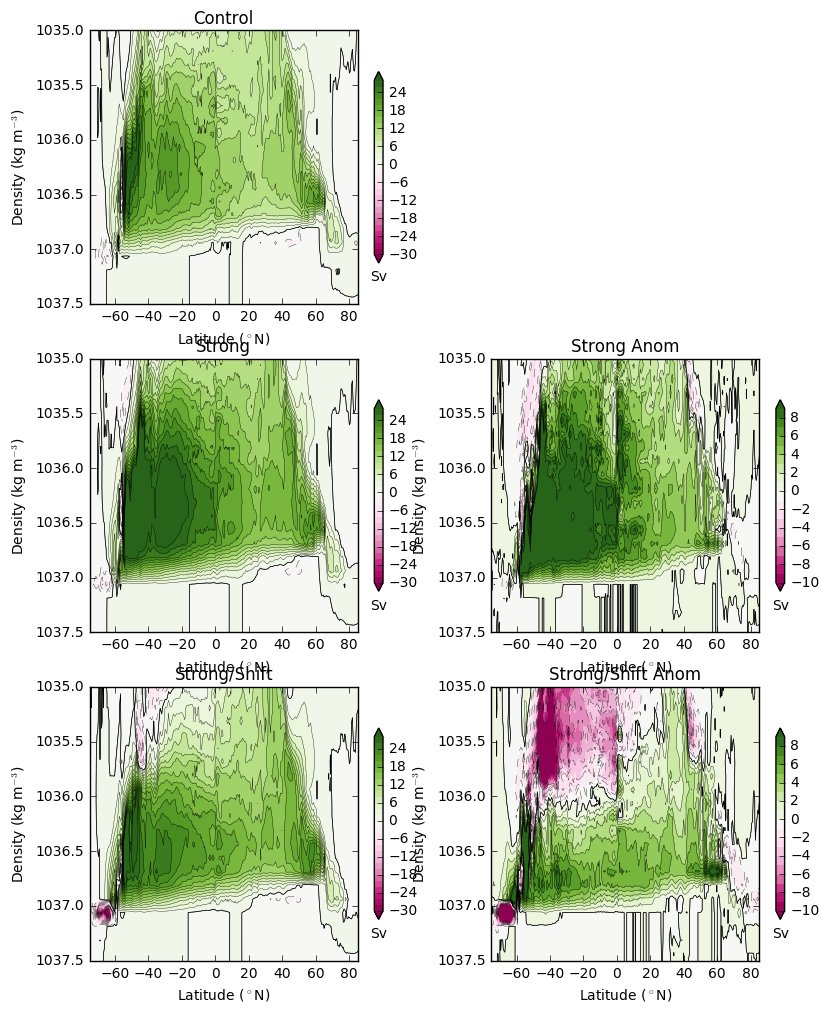

In [13]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-30,30,2)
clev2 = np.arange(-10,10,1)

plt.subplot(321)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Control')

plt.subplot(323)
plt.contourf(yu_ocean,potrho,np.mean(up_gmoc_rho[26:30,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[26:30,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[26:30,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Strong')

plt.subplot(324)
plt.contourf(yu_ocean,potrho,np.mean(up_gmoc_rho[26:30,:,:],axis=0)-np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev2,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[26:30,:,:],axis=0)-np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),levels=clev2,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[26:30,:,:],axis=0)-np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Strong Anom')


plt.subplot(325)
plt.contourf(yu_ocean,potrho,np.mean(pi_gmoc_rho[26:30,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(pi_gmoc_rho[26:30,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(pi_gmoc_rho[26:30,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Strong/Shift')

plt.subplot(326)
plt.contourf(yu_ocean,potrho,np.mean(pi_gmoc_rho[26:30,:,:],axis=0)-np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev2,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(pi_gmoc_rho[26:30,:,:],axis=0)-np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),levels=clev2,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(pi_gmoc_rho[26:30,:,:],axis=0)-np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Strong/Shift Anom')


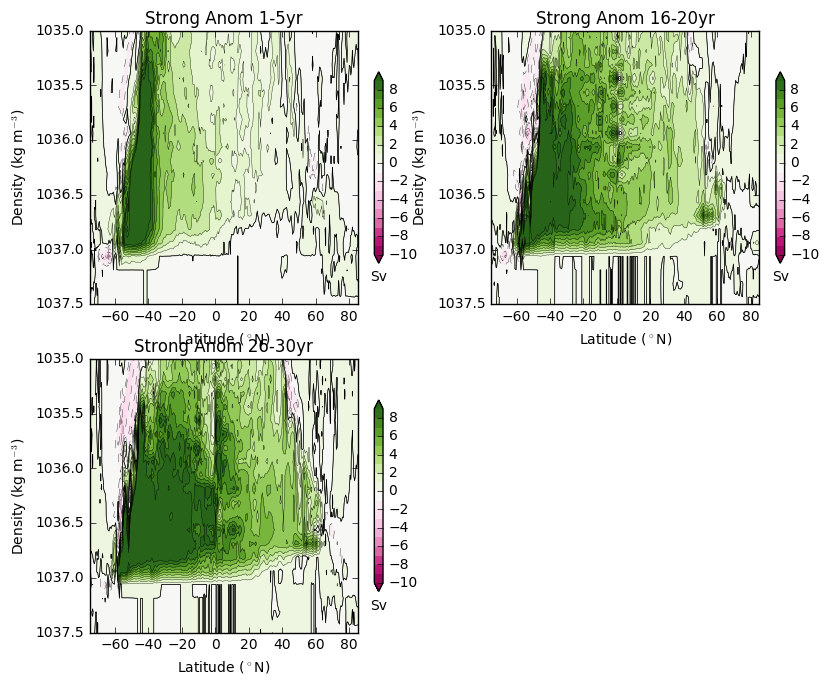

In [21]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-30,30,2)
clev2 = np.arange(-10,10,1)

plt.subplot(321)
plt.contourf(yu_ocean,potrho,np.mean(up_gmoc_rho[0:4,:,:],axis=0)-np.mean(cntrl_gmoc_rho[0:4,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev2,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[0:4,:,:],axis=0)-np.mean(cntrl_gmoc_rho[0:4,:,:],axis=0),levels=clev2,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[0:4,:,:],axis=0)-np.mean(cntrl_gmoc_rho[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Strong Anom 1-5yr')

plt.subplot(322)
plt.contourf(yu_ocean,potrho,np.mean(up_gmoc_rho[16:20,:,:],axis=0)-np.mean(cntrl_gmoc_rho[16:20,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev2,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[16:20,:,:],axis=0)-np.mean(cntrl_gmoc_rho[16:20,:,:],axis=0),levels=clev2,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[16:20,:,:],axis=0)-np.mean(cntrl_gmoc_rho[16:20,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Strong Anom 16-20yr')

plt.subplot(323)
plt.contourf(yu_ocean,potrho,np.mean(up_gmoc_rho[26:30,:,:],axis=0)-np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev2,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[26:30,:,:],axis=0)-np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),levels=clev2,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(up_gmoc_rho[26:30,:,:],axis=0)-np.mean(cntrl_gmoc_rho[26:30,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Strong Anom 26-30yr')


In [17]:
j1 = 233
j2=234

print yt_ocean[j1:j2]

[ 59.44525528]


(30,)
[ 60.48487473]
1036.5625
(31, 80, 1)
(31,)
(31,)
(31,)
[ 24.5962925]
1036.5625
(31, 80, 1)
(31,)
(31,)
(31,)


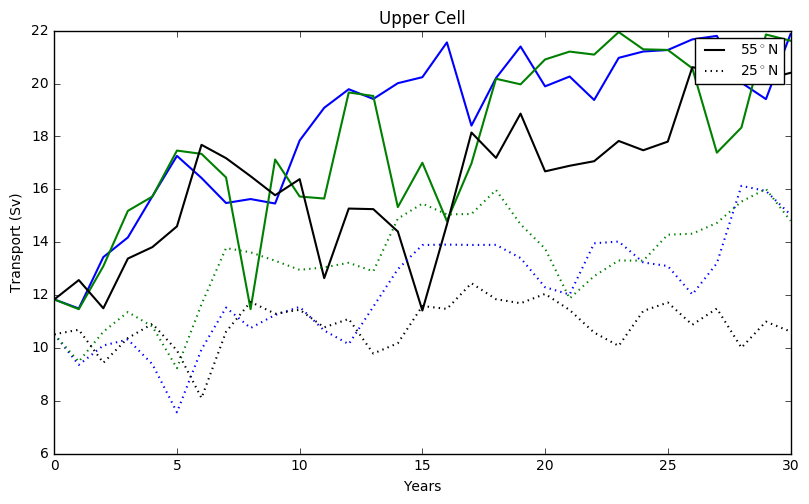

In [19]:
#plot time series 
T=np.arange(30)
print T.shape

#do nh upper cell at 55N
j1 = 225
j2=226
j1 = 235
j2=236
print yt_ocean[j1:j2]
rhomin=68
print potrho[rhomin]


cntrl55N_psj = cntrl_gmoc_rho[:,:,j1:j2]
print cntrl55N_psj.shape
cntrl55N_psj_bar = np.mean(cntrl55N_psj,2)
cntrl55N_psj_ts = np.max(cntrl55N_psj_bar[:,rhomin:],1)
print cntrl55N_psj_ts.shape

up55N_psj = up_gmoc_rho[:,:,j1:j2]
up55N_psj_bar = np.mean(up55N_psj,2)
up55N_psj_ts = np.max(up55N_psj_bar[:,rhomin:],1)
up55N_psj_ts = np.insert(up55N_psj_ts,0,cntrl55N_psj_ts[0])
print up55N_psj_ts.shape

pi55N_psj = pi_gmoc_rho[:,:,j1:j2]
pi55N_psj_bar = np.mean(pi55N_psj,2)
pi55N_psj_ts = np.max(pi55N_psj_bar[:,rhomin:],1)
pi55N_psj_ts = np.insert(pi55N_psj_ts,0,cntrl55N_psj_ts[0])
print pi55N_psj_ts.shape

#do nh upper cell at 25N
j1 = 191
j2=192
print yt_ocean[j1:j2]
print potrho[rhomin]

cntrl25N_psj = cntrl_gmoc_rho[:,:,j1:j2]
print cntrl55N_psj.shape
cntrl25N_psj_bar = np.mean(cntrl25N_psj,2)
cntrl25N_psj_ts = np.max(cntrl25N_psj_bar[:,rhomin:],1)
print cntrl25N_psj_ts.shape

up25N_psj = up_gmoc_rho[:,:,j1:j2]
up25N_psj_bar = np.mean(up25N_psj,2)
up25N_psj_ts = np.max(up25N_psj_bar[:,rhomin:],1)
up25N_psj_ts = np.insert(up25N_psj_ts,0,cntrl25N_psj_ts[0])
print up25N_psj_ts.shape

pi25N_psj = pi_gmoc_rho[:,:,j1:j2]
pi25N_psj_bar = np.mean(pi25N_psj,2)
pi25N_psj_ts = np.max(pi25N_psj_bar[:,rhomin:],1)
pi25N_psj_ts = np.insert(pi25N_psj_ts,0,cntrl25N_psj_ts[0])
print pi25N_psj_ts.shape


plt.subplot(212)
plt.plot(pi55N_psj_ts,linestyle='-',color='b',linewidth=1.5)
plt.plot(up55N_psj_ts,linestyle='-',color='g',linewidth=1.5)
plt.plot(cntrl55N_psj_ts,linestyle='-',color='k',label='55$^\circ$N',linewidth=1.5)
plt.plot(pi25N_psj_ts,linestyle=':',color='b',linewidth=1.5)
plt.plot(up25N_psj_ts,linestyle=':',color='g',linewidth=1.5)
plt.plot(cntrl25N_psj_ts,linestyle=':',color='k',label='25$^\circ$N',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('Upper Cell')
plt.legend(fontsize=10)


In [ ]:
#GMOC Hovmoeller in rho space
time = np.arange(0,30,1)
print time.shape


print potrho[68]
st_min=68

a=np.mean(cntrl_gmoc_rho[:,:,:],axis=0)
print 'a', a.shape

print up_gmoc_rho.shape

up_gmoc_rho_anom= up_gmoc_rho[:,:,:] - np.mean(cntrl_gmoc_rho[:,:,:],axis=0)#cntrl_gmoc_rho[1:,:,:]
print up_gmoc_rho_anom.shape

up_gmoc_rho_anom_max = np.max(up_gmoc_rho_anom[:,st_min:,:],1)
print up_gmoc_rho_anom_max.shape

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(-10,10,21)
print clev

plt.subplot(211)
plt.contourf(time,yu_ocean,up_gmoc_rho_anom_max.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Sv')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Years)')
plt.ylim([-20,70])
a = 'Strong Max GMOC Anom >'+ str(potrho[st_min])+ 'kg/m3/s Rho Coords'
plt.title(a)

print a
#print potrho[65]
#st_min=65

#a=np.mean(cntrl_amoc_rho[0:4,:,:],axis=0)
#print 'a', a.shape

pi_gmoc_rho_anom= pi_gmoc_rho[:,:,:] - np.mean(cntrl_gmoc_rho[:,:,:],axis=0)#cntrl_gmoc_rho[1:,:,:]
print pi_gmoc_rho_anom.shape

pi_gmoc_rho_anom_max = np.max(pi_gmoc_rho_anom[:,st_min:,:],1)
print pi_gmoc_rho_anom_max.shape

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(-10,10,21)
print clev

#plt.subplot(212)
#plt.contourf(time,yu_ocean,pi_gmoc_rho_anom_max.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_ylabel('Sv')
##plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
##plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
##plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
##plt.ylim((-75,-53))
##plt.ylim((1037.5,1035))
#plt.ylabel('Latitude ($^\circ$)')
#plt.xlabel('Time (Years)')
#plt.ylim([-20,70])
#plt.title('Strong/Shift Max GMOC Anom > 1036.2 kg/m3/s Rho Coords')

In [ ]:
a = 'Strong Max GMOC Anom >'+ str(potrho[st_min])+ 'kg/m3/s Rho Coords'
print a

In [ ]:
#calculate the Atl MOCs
#load mask
#-1 is Atl and Arctic, all else is 0 
msk_file='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/basin_mask.nc'
nc = Dataset(msk_file, mode='r') # file handle, open in read only mode
msk= nc.variables['kmt'][:]
nc.close() # close the file
print msk.shape
msk[np.where(msk<-1)]=0

#calculate the AMOC for CNTRL in rho space
Ocean_File = os.path.join(CntrlDir,'output*/ocean__1*.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.ty_trans_rho.shape

ty=ff.ty_trans_rho*msk*-1
print ty.shape

#check masking
#plt.imshow(ty[9,60,:,:])
#plt.gca().invert_yaxis()
#plt.show()

#cn_amoc=ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()
amoc=ty[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()

print amoc.shape

of=os.path.join(CntrlDir,'cntrlwombat_amoc_rho.npy')
a=np.save(of,amoc)

#do in zspace
Ocean_File = os.path.join(CntrlDir,'output*/ocean__1*.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.ty_trans.shape

ty=ff.ty_trans*msk*-1
print ty.shape
amoc=ty[:,:,:,:].sum('xt_ocean').cumsum('st_ocean').load()
print amoc.shape

of=os.path.join(CntrlDir,'cntrlwombat_amoc_z.npy')
a=np.save(of,amoc)

#calculate the AMOC for up in rho space
Ocean_File = os.path.join(UPDir,'output*/ocean__1*.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.ty_trans_rho.shape

ty=ff.ty_trans_rho*msk*-1
print ty.shape
amoc=ty[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()
print amoc.shape

of=os.path.join(UPDir,'upwombat_amoc_rho.npy')
a=np.save(of,amoc)

#do in zspace
Ocean_File = os.path.join(UPDir,'output*/ocean__1*.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.ty_trans.shape
ty=ff.ty_trans*msk*-1
print ty.shape
amoc=ty[:,:,:,:].sum('xt_ocean').cumsum('st_ocean').load()
print amoc.shape

of=os.path.join(UPDir,'upwombat_amoc_z.npy')
a=np.save(of,amoc)





In [ ]:
of=os.path.join(UPDir,'upwombat_amoc_z.npy')
up_amoc_z=np.load(of)
print up_amoc_z.shape

of=os.path.join(CntrlDir,'cntrlwombat_amoc_z.npy')
cntrl_amoc_z=np.load(of)
print cntrl_amoc_z.shape

of=os.path.join(UPDir,'upwombat_amoc_rho.npy')
up_amoc_rho=np.load(of)
print up_amoc_rho.shape

of=os.path.join(CntrlDir,'cntrlwombat_amoc_rho.npy')
cntrl_amoc_rho=np.load(of)
print cntrl_amoc_rho.shape

In [ ]:
#Amoc in density space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-20,20,2)

plt.subplot(211)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_amoc_rho[0:4,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_amoc_rho[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_amoc_rho[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
plt.title('Control')

plt.subplot(212)
plt.contourf(yu_ocean,potrho,np.mean(up_amoc_rho[14:16:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(up_amoc_rho[14:16,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(up_amoc_rho[14:16,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
plt.title('Strong')



In [ ]:
#plot time series of AMOC in rho space
T=np.arange(50)
print T.shape

#do nh upper cell at 55N
j1 = 765
j2=770

print yt_ocean[j1:j2]
print potrho[65]
st_min=65

cntrl55N_psj = cntrl_amoc_rho[:,:,j1:j2]
print cntrl55N_psj.shape
cntrl55N_psj_bar = np.mean(cntrl55N_psj,2)
print cntrl55N_psj_bar.shape
cntrl55N_psj_ts = np.max(cntrl55N_psj_bar[:,st_min:],1)
print cntrl55N_psj_ts.shape

up55N_psj = up_amoc_rho[:,:,j1:j2]
up55N_psj_bar = np.mean(up55N_psj,2)
up55N_psj_ts = np.max(up55N_psj_bar[:,st_min:],1)
up55N_psj_ts = np.insert(up55N_psj_ts,0,cntrl55N_psj_ts[0])
print up55N_psj_ts.shape

#do nh upper cell at 35N
j1 = 650
j2=655

print yt_ocean[j1:j2]
print potrho[st_min]

cntrl35N_psj = cntrl_amoc_rho[:,:,j1:j2]
print cntrl35N_psj.shape
cntrl35N_psj_bar = np.mean(cntrl35N_psj,2)
cntrl35N_psj_ts = np.max(cntrl35N_psj_bar[:,st_min:],1)
print cntrl35N_psj_ts.shape

up35N_psj = up_amoc_rho[:,:,j1:j2]
up35N_psj_bar = np.mean(up35N_psj,2)
up35N_psj_ts = np.max(up35N_psj_bar[:,st_min:],1)
up35N_psj_ts = np.insert(up35N_psj_ts,0,cntrl35N_psj_ts[0])
print up35N_psj_ts.shape


#do nh upper cell at 25N
j1 = 600
j2=610

print yt_ocean[j1:j2]
print potrho[st_min]

cntrl25N_psj = cntrl_amoc_rho[:,:,j1:j2]
print cntrl55N_psj.shape
cntrl25N_psj_bar = np.mean(cntrl25N_psj,2)
cntrl25N_psj_ts = np.max(cntrl25N_psj_bar[:,st_min:],1)
print cntrl25N_psj_ts.shape

up25N_psj = up_amoc_rho[:,:,j1:j2]
up25N_psj_bar = np.mean(up25N_psj,2)
up25N_psj_ts = np.max(up25N_psj_bar[:,st_min:],1)
up25N_psj_ts = np.insert(up25N_psj_ts,0,cntrl25N_psj_ts[0])
print up25N_psj_ts.shape

plt.subplot(211)
plt.plot(up55N_psj_ts[0:49],linestyle='-',color='g',linewidth=1.5)
plt.plot(cntrl55N_psj_ts,linestyle='-',color='k',label='55$^\circ$N',linewidth=1.5)
plt.plot(up35N_psj_ts[0:49],linestyle='--',color='g',linewidth=1.5)
plt.plot(cntrl35N_psj_ts,linestyle='--',color='k',label='35$^\circ$N',linewidth=1.5)
plt.plot(up25N_psj_ts[0:49],linestyle=':',color='g',linewidth=1.5)
plt.plot(cntrl25N_psj_ts,linestyle=':',color='k',label='25$^\circ$N',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('Upper Cell Rho Space')
plt.legend(fontsize=10)


In [ ]:
#AMOC Hovmoeller in rho space
time = np.arange(0,17,1)
print time.shape


print potrho[21]
st_min=21

#a=np.mean(cntrl_amoc_rho[0:4,:,:],axis=0)
#print 'a', a.shape

up_amoc_rho_anom= up_amoc_rho[:,:,:] - np.mean(cntrl_amoc_rho[0:4,:,:],axis=0)
print up_amoc_rho_anom.shape

up_amoc_rho_anom_max = np.max(up_amoc_rho_anom[:,st_min:,:],1)
print up_amoc_rho_anom_max.shape

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(-10,10,21)
print clev

plt.subplot(211)
plt.contourf(time,yu_ocean,up_amoc_rho_anom_max.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Sv')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Months)')
plt.ylim([-20,70])
plt.title('Strong Max AMOC Anom > 1030.7 kg/m3/s Rho Coords')

print potrho[65]
st_min=65

#a=np.mean(cntrl_amoc_rho[0:4,:,:],axis=0)
#print 'a', a.shape

up_amoc_rho_anom= up_amoc_rho[:,:,:] - np.mean(cntrl_amoc_rho[0:4,:,:],axis=0)
print up_amoc_rho_anom.shape

up_amoc_rho_anom_max = np.max(up_amoc_rho_anom[:,st_min:,:],1)
print up_amoc_rho_anom_max.shape

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(-10,10,21)
print clev

plt.subplot(212)
plt.contourf(time,yu_ocean,up_amoc_rho_anom_max.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Sv')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Months)')
plt.ylim([-20,70])
plt.title('Strong Max AMOC Anom > 1036.2 kg/m3/s Rho Coords')

In [ ]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-20,20,2)

plt.subplot(211)
plt.contourf(yu_ocean,st_ocean,np.mean(cntrl_amoc_z[0:4,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(cntrl_amoc_z[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(cntrl_amoc_z[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
plt.title('Control')

plt.subplot(212)
plt.contourf(yu_ocean,st_ocean,np.mean(up_amoc_z[14:16,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,st_ocean,np.mean(up_amoc_z[14:16,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,st_ocean,np.mean(up_amoc_z[14:16,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-30,85])
plt.title('Strong')



In [ ]:
#plot time series of AMOC in z space
T=np.arange(17)
print T.shape

#do nh upper cell at 55N
j1 = 765
j2=770

print yt_ocean[j1:j2]
print st_ocean[21]
st_min=21

cntrl55N_psj = cntrl_amoc_z[:,:,j1:j2]
print cntrl55N_psj.shape
cntrl55N_psj_bar = np.mean(cntrl55N_psj,2)
print cntrl55N_psj_bar.shape
cntrl55N_psj_ts = np.max(cntrl55N_psj_bar[:,st_min:],1)
print cntrl55N_psj_ts.shape

up55N_psj = up_amoc_z[:,:,j1:j2]
up55N_psj_bar = np.mean(up55N_psj,2)
up55N_psj_ts = np.max(up55N_psj_bar[:,st_min:],1)
up55N_psj_ts = np.insert(up55N_psj_ts,0,cntrl55N_psj_ts[0])
print up55N_psj_ts.shape

#do nh upper cell at 35N
j1 = 650
j2=655

print yt_ocean[j1:j2]
print st_ocean[st_min]

cntrl35N_psj = cntrl_amoc_z[:,:,j1:j2]
print cntrl35N_psj.shape
cntrl35N_psj_bar = np.mean(cntrl35N_psj,2)
cntrl35N_psj_ts = np.max(cntrl35N_psj_bar[:,st_min:],1)
print cntrl35N_psj_ts.shape

up35N_psj = up_amoc_z[:,:,j1:j2]
up35N_psj_bar = np.mean(up35N_psj,2)
up35N_psj_ts = np.max(up35N_psj_bar[:,st_min:],1)
up35N_psj_ts = np.insert(up35N_psj_ts,0,cntrl35N_psj_ts[0])
print up35N_psj_ts.shape


#do nh upper cell at 25N
j1 = 600
j2=610

print yt_ocean[j1:j2]
print st_ocean[st_min]

cntrl25N_psj = cntrl_amoc_z[:,:,j1:j2]
print cntrl55N_psj.shape
cntrl25N_psj_bar = np.mean(cntrl25N_psj,2)
cntrl25N_psj_ts = np.max(cntrl25N_psj_bar[:,st_min:],1)
print cntrl25N_psj_ts.shape

up25N_psj = up_amoc_z[:,:,j1:j2]
up25N_psj_bar = np.mean(up25N_psj,2)
up25N_psj_ts = np.max(up25N_psj_bar[:,st_min:],1)
up25N_psj_ts = np.insert(up25N_psj_ts,0,cntrl25N_psj_ts[0])
print up25N_psj_ts.shape

plt.subplot(211)
plt.plot(up55N_psj_ts[0:49],linestyle='-',color='g',linewidth=1.5)
plt.plot(cntrl55N_psj_ts,linestyle='-',color='k',label='55$^\circ$N',linewidth=1.5)
plt.plot(up35N_psj_ts[0:49],linestyle='--',color='g',linewidth=1.5)
plt.plot(cntrl35N_psj_ts,linestyle='--',color='k',label='35$^\circ$N',linewidth=1.5)
plt.plot(up25N_psj_ts[0:49],linestyle=':',color='g',linewidth=1.5)
plt.plot(cntrl25N_psj_ts,linestyle=':',color='k',label='25$^\circ$N',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('Upper Cell')
plt.legend(fontsize=10)


In [ ]:
#Hovmoeller in z space
time = np.arange(0,17,1)
print time.shape


print st_ocean[10]
st_min=10


up_amoc_z_anom= up_amoc_z[:,:,:] - np.mean(cntrl_amoc_z[0:4,:,:],axis=0)
print up_amoc_z_anom.shape

up_amoc_z_anom_max = np.max(up_amoc_z_anom[:,st_min:,:],1)
print up_amoc_z_anom_max.shape

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(-10,10,21)
print clev

plt.subplot(211)
plt.contourf(time,yu_ocean,up_amoc_z_anom_max.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Sv')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Months)')
plt.ylim([-20,70])
plt.title('Strong Max AMOC Anom >  Z Coords')

print st_ocean[21]
st_min=21


up_amoc_z_anom= up_amoc_z[:,:,:] - np.mean(cntrl_amoc_z[0:4,:,:],axis=0)
print up_amoc_z_anom.shape

up_amoc_z_anom_max = np.max(up_amoc_z_anom[:,st_min:,:],1)
print up_amoc_z_anom_max.shape

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(-10,10,21)
print clev

plt.subplot(212)
plt.contourf(time,yu_ocean,up_amoc_z_anom_max.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_ylabel('Sv')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-53))
#plt.ylim((1037.5,1035))
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Time (Months)')
plt.ylim([-20,70])
plt.title('Strong Max AMOC Anom >  Z  Coords')

In [ ]:
#zonal average winds stress in Southern Ocean
Ocean_File = os.path.join(CntrlDir,'output*/ocean_force*.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.tau_x.shape

cn=ff.tau_x[-12:,:,:].mean('Time').mean('xu_ocean').load()
print cn.shape

Ocean_File = os.path.join(UPDir,'output*/ocean_force*.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.tau_x.shape

up=ff.tau_x[-12:,:,:].mean('Time').mean('xu_ocean').load()
print up.shape




In [ ]:
#zonal average winds speed in Southern Ocean
uwspd=np.zeros((2,94))


Ocean_File = os.path.join('/g/data1/v45/pas561/mom/input/u_10.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='TIME',decode_times=False)
print ff.U_10_MOD.shape
uwspd[0,:]=ff.U_10_MOD[:,:,:].mean('TIME').mean('LON').load()

Ocean_File = os.path.join('/g/data1/v45/pas561/mom/input/u_10.30Sup15.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='TIME',decode_times=False)
print ff.U_10_MOD.shape
uwspd[1,:]=ff.U_10_MOD[:,:,:].mean('TIME').mean('LON').load()

uwspd_lat=ff.LAT.load()
print uwspd_lat.shape
print uwspd.shape

#plot wind speed
plt.subplot(211)
plt.plot(uwspd_lat,uwspd[0,:],linestyle='-',color='k',linewidth=2,label='Control')
plt.plot(uwspd_lat,uwspd[1,:],linestyle='-',color='g',linewidth=2,label='Strong/Shift')
plt.xlim([-75,-35])
#plt.ylim([-0.02,0.2])
plt.xlabel('Latitude ($^\circ$)')
plt.ylabel('Speed (m/s)')
plt.legend(loc=8,fontsize=10)
plt.title('(a)')


In [ ]:
#north atl mld, sea ice changes, surface and bottom velocity anomalies in Atl., density and carbon.

Ocean_File = os.path.join(CntrlDir,'output*/ocean__1*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
nyf_mld=ff.mld[-10:,:,:].mean('Time').load()
print nyf_mld.shape

Ocean_File = os.path.join(UPDir,'output*/ocean__1*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
up_mld=ff.mld.load()
print up_mld.shape

In [ ]:
#plot mld
ii1=np.argwhere(xt_ocean>-100)# and lat<-45)
ii2=np.argwhere(xt_ocean>50)# and lat<-45)
jj1=np.argwhere(yt_ocean>30)# and lat<-45)
jj2=np.argwhere(yt_ocean>80)# and lat<-45)
ii1=ii1[0]
ii2=ii2[0]
jj1=jj1[0]
jj2=1079
#jj2=jj2[0]

print "mld bounds lon1 lon2 lat1 lat2", xt_ocean[ii1], xt_ocean[ii2], yt_ocean[jj1], yt_ocean[jj2]

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(221)#,axisbg='gray')
clev = np.arange(0,1200,100)
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,nyf_mld[jj1:jj2,ii1:ii2], cmap=plt.cm.Purples, levels=clev, extend='max') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
plt.title('(a) Control')
#plt.show()

clev = np.arange(-500,500,10)
clev2 = np.arange(-200,200,10)

plt.subplot(222)
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,np.mean(up_mld[0:9,jj1:jj2,ii1:ii2],axis=0)-nyf_mld[jj1:jj2,ii1:ii2], cmap=plt.cm.PuOr, levels=clev2, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
plt.title('(b) Year 1-10 anom')
#plt.show()


plt.subplot(223)
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,np.mean(up_mld[10:17,jj1:jj2,ii1:ii2],axis=0)-nyf_mld[jj1:jj2,ii1:ii2], cmap=plt.cm.PuOr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
plt.title('(c) Year 11-20 anom')
#plt.show()

#plt.subplot(224)
#map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
#X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
#map.contourf(X,Y,np.mean(up_mld[20:29,jj1:jj2,ii1:ii2],axis=0)-nyf_mld[jj1:jj2,ii1:ii2], cmap=plt.cm.PuOr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb = plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('MLD\n (m)')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
## draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
#map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
#plt.title('(d) Year 21-30 anom')
#plt.show()

plt.show()

#plt.subplot(221)
#print nyf_mld.shape

#clev = np.arange(0,1000,100)
#plt.contourf(geolon_t,geolat_t,nyf_mld[0],cmap=plt.cm.rainbow_r,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('m')
##clev = np.arange(-2,1,0.05)
##plt.hold()
#plt.contour(geolon_t,geolat_t,nyf_ssh[0],levels=clev,colors='k',linewidths=0.25)
#plt.ylabel('Latitude ($^\circ$)')
#plt.xlabel('Longitude ($^\circ$)')
#plt.ylim([40,80])
#plt.xlim([-100,50])
#plt.title('MLD with SSH contours')



In [ ]:
print np.max(fh[540:1080,:])
print np.min(fh[540:1080,:])

In [ ]:
Ocean_File = os.path.join(CntrlDir,'output*/ice__*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff.CN.shape
nyf_cn=ff.CN[0:119,:,:,:].mean('time').sum('ct').load()
print nyf_cn.shape

Ocean_File = os.path.join(UPDir,'output*/ice__*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
up_cn1=ff.CN[0:119,:,:,:].mean('time').sum('ct').load()
print up_cn1.shape
up_cn2=ff.CN[120:239,:,:,:].mean('time').sum('ct').load()
print up_cn2.shape
up_cn3=ff.CN[240:359,:,:,:].mean('time').sum('ct').load()
print up_cn3.shape



In [ ]:
#plot NAtl Sea Ice 
ii1=np.argwhere(xt_ocean>-100)# and lat<-45)
ii2=np.argwhere(xt_ocean>50)# and lat<-45)
jj1=np.argwhere(yt_ocean>30)# and lat<-45)
jj2=np.argwhere(yt_ocean>80)# and lat<-45)
ii1=ii1[0]
ii2=ii2[0]
jj1=jj1[0]
jj2=1079

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.linspace(0,1.0,21)
print clev

plt.subplot(221)#,axisbg='gray')
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,nyf_cn[jj1:jj2,ii1:ii2], cmap=plt.cm.Purples, levels=clev, extend='max') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
plt.title('(a) Control')
#plt.show()

plt.subplot(222)#,axisbg='gray')
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,up_cn1[jj1:jj2,ii1:ii2], cmap=plt.cm.Purples, levels=clev, extend='max') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
plt.title('(b) Year 1-10')
#plt.show()

plt.subplot(223)#,axisbg='gray')
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,up_cn2[jj1:jj2,ii1:ii2], cmap=plt.cm.Purples, levels=clev, extend='max') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
plt.title('(c) Year 11-20')
#plt.show()

plt.subplot(224)#,axisbg='gray')
map = Basemap(llcrnrlon=-63,llcrnrlat=38,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,up_cn3[jj1:jj2,ii1:ii2], cmap=plt.cm.Purples, levels=clev, extend='max') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht[jj1:jj2,ii1:ii2],levels=clev3,colors='k',linewidths=0.25)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
plt.title('(d) Year 20-29')
#plt.show()

In [ ]:
#plot near surface velocity anomaly vectors
Ocean_File = os.path.join(CntrlDir,'output*/ocean__1*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
nyf_u=ff.u[:,:,:,:].mean('Time').load()
nyf_v=ff.v[:,:,:,:].mean('Time').load()
print nyf_u.shape

Ocean_File = os.path.join(UPDir,'output*/ocean__1*.nc')
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
up_u1a=ff.u[0:4,:,:,:].mean('Time').load()
up_v1a=ff.v[0:4,:,:,:].mean('Time').load()
print up_v1a.shape

up_u1b=ff.u[5:9,:,:,:].mean('Time').load()
up_v1b=ff.v[5:9,:,:,:].mean('Time').load()
print up_v1b.shape

up_u2=ff.u[10:17,:,:,:].mean('Time').load()
up_v2=ff.v[10:17,:,:,:].mean('Time').load()
print up_u2.shape

#up_u3=ff.u[20:29,:,:,:].mean('Time').load()
#up_v3=ff.v[20:29,:,:,:].mean('Time').load()
#print up_u3.shape


In [ ]:
#smooth velocity data with a gaussian filter
#set sigma
s=2
#set window
w=7
#solve for truncation
t = (((w - 1)/2)-0.5)/s

#nyf_u_sm = scipy.ndimage.filters.gaussian_filter(nyf_u[10,:,:], s,truncate=t)
#print nyf_u_sm.shape
#nyf_v_sm = scipy.ndimage.filters.gaussian_filter(nyf_v[10,:,:], s,truncate=t)





In [ ]:
print st_ocean[10]

In [ ]:
#plot NAtl velocity
ii1=np.argwhere(xt_ocean>-100)# and lat<-45)
ii2=np.argwhere(xt_ocean>20)# and lat<-45)
jj1=np.argwhere(yt_ocean>25)# and lat<-45)
jj2=np.argwhere(yt_ocean>70)# and lat<-45)
ii1=ii1[0]
ii2=ii2[0]
jj1=jj1[0]
jj2=1079

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

spc=10

nyf_u_sm = scipy.ndimage.filters.gaussian_filter(nyf_u[10,:,:], s,truncate=t)
print nyf_u_sm.shape
nyf_v_sm = scipy.ndimage.filters.gaussian_filter(nyf_v[10,:,:], s,truncate=t)

plt.subplot(321)#,axisbg='gray')
plt.quiver(geolon_t[jj1:jj2:spc,ii1:ii2:spc],geolat_t[jj1:jj2:spc,ii1:ii2:spc],nyf_u_sm[jj1:jj2:spc,ii1:ii2:spc],
            nyf_v_sm[jj1:jj2:spc,ii1:ii2:spc],scale=1,scale_units='inches')
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([25,70])
plt.xlim([-100,20])
plt.title('(a) Control at 110m')

nyf_u30_sm = scipy.ndimage.filters.gaussian_filter(nyf_u[30,:,:], s,truncate=t)
print nyf_u30_sm.shape
print st_ocean[30]
nyf_v30_sm = scipy.ndimage.filters.gaussian_filter(nyf_v[30,:,:], s,truncate=t)

plt.subplot(322)#,axisbg='gray')
plt.quiver(geolon_t[jj1:jj2:spc,ii1:ii2:spc],geolat_t[jj1:jj2:spc,ii1:ii2:spc],nyf_u30_sm[jj1:jj2:spc,ii1:ii2:spc],
            nyf_v30_sm[jj1:jj2:spc,ii1:ii2:spc],scale=0.1,scale_units='inches')
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([25,70])
plt.xlim([-100,20])
plt.title('(b) Control at 1500m')

up_u_sm = scipy.ndimage.filters.gaussian_filter(up_u1a[10,:,:], s,truncate=t)
print up_u_sm.shape
up_v_sm = scipy.ndimage.filters.gaussian_filter(up_v1a[10,:,:], s,truncate=t)

plt.subplot(323)#,axisbg='gray')
plt.quiver(geolon_t[jj1:jj2:spc,ii1:ii2:spc],geolat_t[jj1:jj2:spc,ii1:ii2:spc],up_u_sm[jj1:jj2:spc,ii1:ii2:spc]-nyf_u_sm[jj1:jj2:spc,ii1:ii2:spc],
            up_v_sm[jj1:jj2:spc,ii1:ii2:spc]-nyf_v_sm[jj1:jj2:spc,ii1:ii2:spc],scale=.05,scale_units='inches')
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([25,70])
plt.xlim([-100,20])
plt.title('(c) up year 1-5 anom at 110m')

up_u_sm = scipy.ndimage.filters.gaussian_filter(up_u1a[30,:,:], s,truncate=t)
print up_u_sm.shape
up_v_sm = scipy.ndimage.filters.gaussian_filter(up_v1a[30,:,:], s,truncate=t)

plt.subplot(324)#,axisbg='gray')
plt.quiver(geolon_t[jj1:jj2:spc,ii1:ii2:spc],geolat_t[jj1:jj2:spc,ii1:ii2:spc],up_u_sm[jj1:jj2:spc,ii1:ii2:spc]-nyf_u30_sm[jj1:jj2:spc,ii1:ii2:spc],
            up_v_sm[jj1:jj2:spc,ii1:ii2:spc]-nyf_v30_sm[jj1:jj2:spc,ii1:ii2:spc],scale=.05,scale_units='inches')
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([25,70])
plt.xlim([-100,20])
plt.title('(c) up year 1-5 anom at 1500m')


up_u_sm = scipy.ndimage.filters.gaussian_filter(up_u1b[10,:,:], s,truncate=t)
print up_u_sm.shape
up_v_sm = scipy.ndimage.filters.gaussian_filter(up_v1b[10,:,:], s,truncate=t)

plt.subplot(325)#,axisbg='gray')
plt.quiver(geolon_t[jj1:jj2:spc,ii1:ii2:spc],geolat_t[jj1:jj2:spc,ii1:ii2:spc],up_u_sm[jj1:jj2:spc,ii1:ii2:spc]-nyf_u_sm[jj1:jj2:spc,ii1:ii2:spc],
            up_v_sm[jj1:jj2:spc,ii1:ii2:spc]-nyf_v_sm[jj1:jj2:spc,ii1:ii2:spc],scale=.05,scale_units='inches')
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([25,70])
plt.xlim([-100,20])
plt.title('(c) up year 6-10 anom at 110m')

up_u_sm = scipy.ndimage.filters.gaussian_filter(up_u1b[30,:,:], s,truncate=t)
print up_u_sm.shape
up_v_sm = scipy.ndimage.filters.gaussian_filter(up_v1b[30,:,:], s,truncate=t)

plt.subplot(326)#,axisbg='gray')
plt.quiver(geolon_t[jj1:jj2:spc,ii1:ii2:spc],geolat_t[jj1:jj2:spc,ii1:ii2:spc],up_u_sm[jj1:jj2:spc,ii1:ii2:spc]-nyf_u30_sm[jj1:jj2:spc,ii1:ii2:spc],
            up_v_sm[jj1:jj2:spc,ii1:ii2:spc]-nyf_v30_sm[jj1:jj2:spc,ii1:ii2:spc],scale=.05,scale_units='inches')
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([25,70])
plt.xlim([-100,20])
plt.title('(c) up year 6-10 anom at 1500m')